# Image Processing (PyTesseract)

In [1]:
import cv2
import pytesseract
from PIL import Image

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r'C:\Users\derek\School\DataRes\Tesseract-OCR\tesseract.exe'

['CHAMBERY', 'EST. 1990']


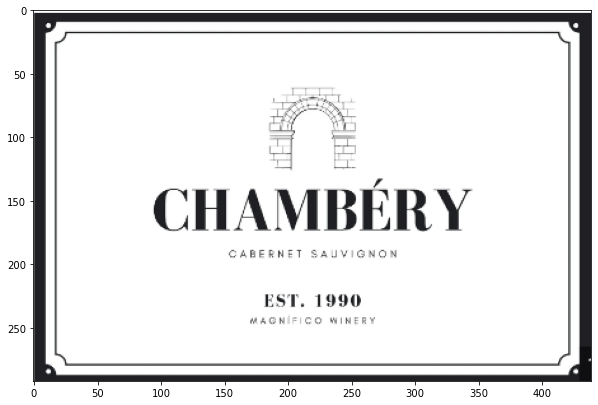

In [43]:
# read image
img = cv2.imread('wine-label.png')

# configurations
config = ('-l eng --oem 3 --psm 4')

# pytessercat
text = pytesseract.image_to_string(img, config=config)

# print text
text = text.split('\n')
while("" in text):
    text.remove("")
print(text)

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
axs.imshow(img, cmap='gray')

['CHAMBERY', 'CABERNET SAUVIGNON', 'EST. 19990', 'MAGN FICO WINERY']


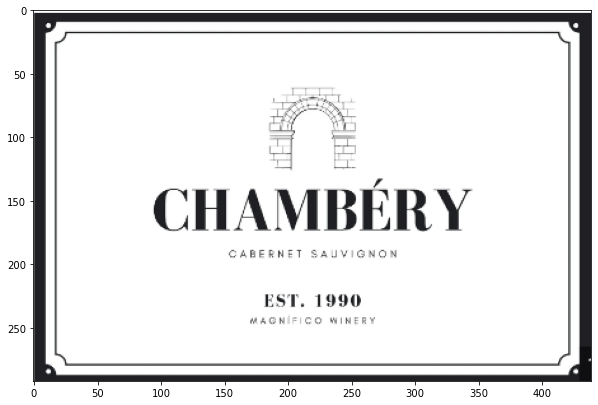

In [45]:
# Increase the resolution
resize = cv2.resize(img, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
text = pytesseract.image_to_string(resize, config=config)

# print text
text = text.split('\n')
while("" in text):
    text.remove("")
print(text)

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
axs.imshow(img, cmap='gray')

['CHAMBERY', 'CABERNET SAUVIGNON', 'EST. 19990', 'MAGN FICO WINERY']


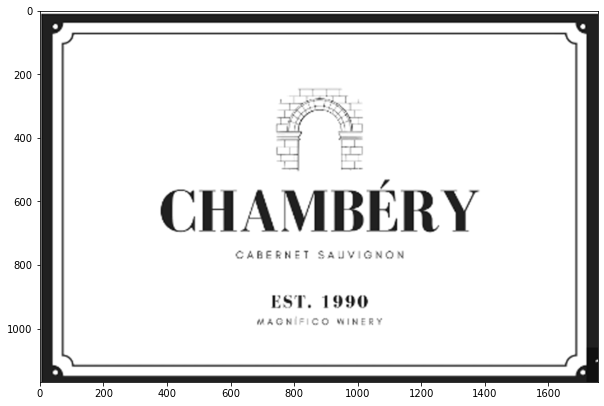

In [46]:
# Convert the image to grayscale
gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)

text = pytesseract.image_to_string(gray, config=config)

# print text
text = text.split('\n')
while("" in text):
    text.remove("")
print(text)

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
axs.imshow(gray, cmap='gray')

['CHAMBERY', 'CABERNET SAUVIGNON', 'EST. 1990', 'WMAGNIFICO WINERY']


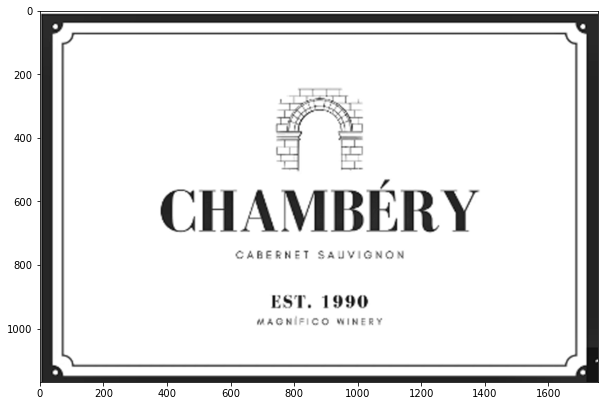

In [47]:
# Apply histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equalized = clahe.apply(gray)

text = pytesseract.image_to_string(equalized, config=config)

# print text
text = text.split('\n')
while("" in text):
    text.remove("")
print(text)

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
axs.imshow(equalized, cmap='gray')

['CHAMBE RY', 'CABERNET SAU', 'EST. 19990', 'W#AON CO WINERY']


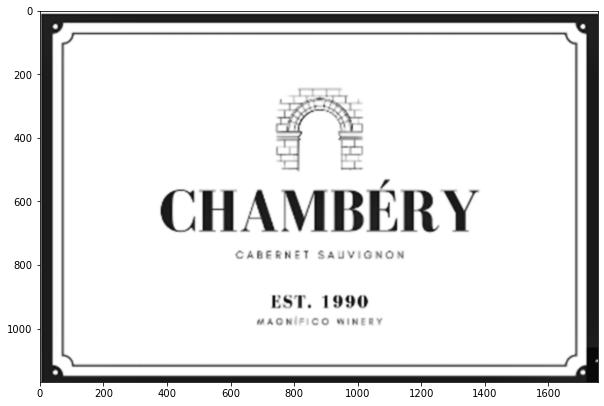

In [48]:
# Bilateral filtering
filter = cv2.bilateralFilter(equalized,9,75,75)

text = pytesseract.image_to_string(filter, config=config)

# print text
text = text.split('\n')
while("" in text):
    text.remove("")
print(text)

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
axs.imshow(filter, cmap='gray')

['CHAMBERY', 'CABERNET SAUVIGNON', 'EST. 1990', 'AARORIFICO WINERY']


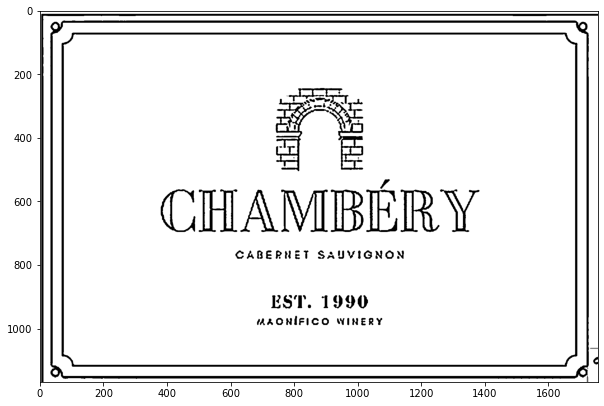

In [49]:
# Apply adaptive thresholding to convert the image to binary
binary = cv2.adaptiveThreshold(filter, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

text = pytesseract.image_to_string(binary, config=config)

# print text
text = text.split('\n')
while("" in text):
    text.remove("")
print(text)

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
axs.imshow(binary, cmap='gray')

['CHAMBERY', 'CABERNET SAUVIGNON', 'EST. 1990', 'MAKONIFICO WINERY']


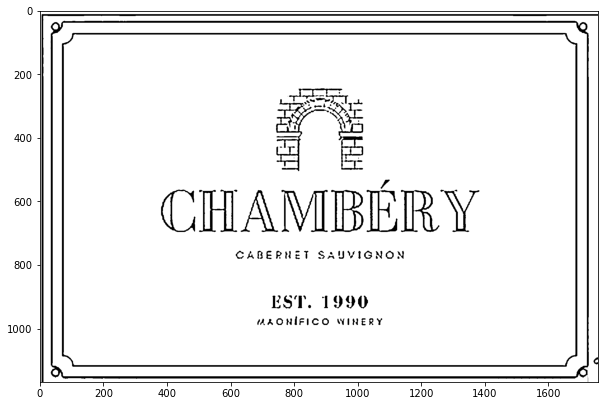

In [50]:
# Apply dilation to fill in gaps in characters
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
dilation = cv2.dilate(binary, kernel, iterations=1)

text = pytesseract.image_to_string(dilation, config=config)

# print text
text = text.split('\n')
while("" in text):
    text.remove("")
print(text)

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
axs.imshow(dilation, cmap='gray')

['CHAMBERY', 'CABERNET SAUVIGNON', 'EST. 1990', 'AAORIFICO WIRERY']


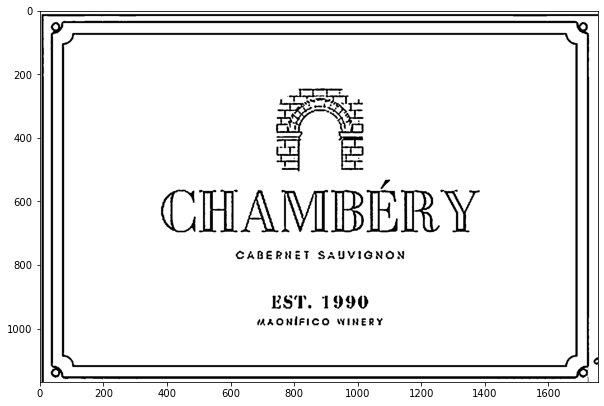

In [51]:
# Apply erosion to remove small noise
erosion = cv2.erode(dilation, kernel, iterations=1)

text = pytesseract.image_to_string(erosion, config=config)

# print text
text = text.split('\n')
while("" in text):
    text.remove("")
print(text)

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
axs.imshow(erosion, cmap='gray')